## Polynomial regression & over-fitting

다음처럼 주어진 데이터에 대해 회귀분석해보자. 

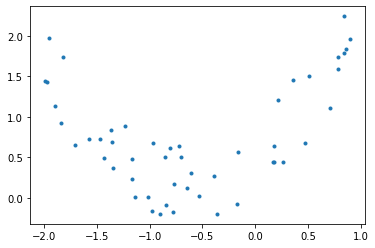

In [130]:
import numpy as np
import matplotlib.pyplot as plt

N=50
X=3*np.random.rand(N,1)-2
y=0.8*X**2 + X + np.random.rand(N,1)
plt.plot(X,y,'.');

In [131]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly_features.fit_transform(X)

In [132]:
from sklearn.linear_model import LinearRegression
reg2=LinearRegression() 
reg2.fit(X_poly2,y)
reg2.intercept_, reg2.coef_

(array([0.45840407]), array([[0.98164571, 0.77036279]]))

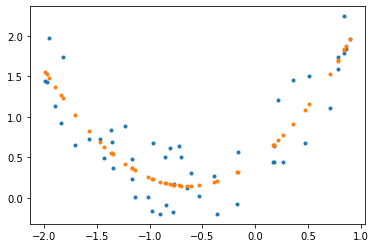

In [133]:
plt.plot(X,y,'.');
x=np.arange(-2,1,0.1);
plt.plot(X_poly2[:,0],reg2.predict(X_poly2),'.')

In [134]:
reg1=LinearRegression()
reg1.fit(X,y)
reg1.coef_, reg1.intercept_

(array([[0.19897233]]), array([0.8664339]))

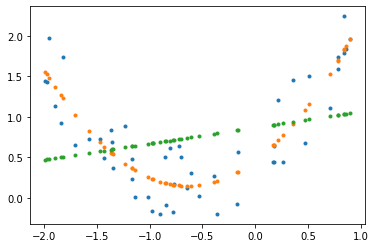

In [135]:
plt.plot(X,y,'.');
x=np.arange(-2,1,0.1);
plt.plot(X_poly2[:,0],reg2.predict(X_poly2),'.')
plt.plot(X,reg1.predict(X),'.')

In [136]:
poly_features = PolynomialFeatures(degree=40, include_bias=False)
X_poly40 = poly_features.fit_transform(X)
reg40=LinearRegression() 
reg40.fit(X_poly40,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

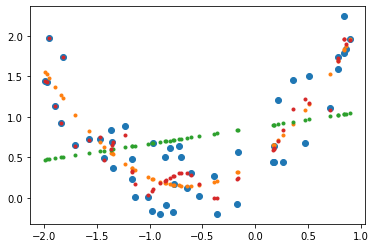

In [137]:
plt.plot(X,y,'o');
plt.plot(X_poly2[:,0],reg2.predict(X_poly2),'.')
plt.plot(X,reg1.predict(X),'.')
plt.plot(X_poly40[:,0],reg40.predict(X_poly40),'.')


## Regression with regularization (정칙화)
* fitting with penalty

### Ridge Regression
일반적인 제곱평균오차(MSE: mean squared error)는 다음과 같다. 
$$ E(\mathbf{w})= (\mathbf Y- \mathbf{X} \mathbf{w})^T (\mathbf{Y} - \mathbf{X} \mathbf{w})$$
릿지 회귀는 MSE오차에 계수들의 제곱을 더한 값을 최소화하는 회귀를 말한다. 즉 다음의 함수를 최소화한다.
$$ E(\mathbf{w})= (\mathbf Y- \mathbf{X} \mathbf{w})^T (\mathbf{Y} - \mathbf{X} \mathbf{w})+\alpha \sum_{i}^n w_i^2.$$
여기에서 $\alpha$는 MSE와 계수의 제곱 사이의 비를 결정한다.

### Lasso Regression
라쏘 회귀는 MSE에 제곱이 아닌 절대값을 페널티로 준다. 즉 다음의 함수를 최소화한다.
$$ E(\mathbf{w})= (\mathbf Y- \mathbf{X} \mathbf{w})^T (\mathbf{Y} - \mathbf{X} \mathbf{w})+\alpha \sum_{i}^n |w_i|.$$
이런 정규화 혹은 정칙화는 오버피팅(over fitting)을 피하게 해준다. 실제 예제에서 이 효과를 살펴보자.

In [138]:
from sklearn.linear_model import Lasso

In [146]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_poly40,y)

/Users/bmin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1021865155258492, tolerance: 0.0021373159999435406
  positive)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

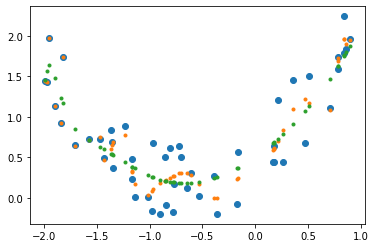

In [147]:
plt.plot(X,y,'o');
plt.plot(X_poly40[:,0],reg40.predict(X_poly40),'.')
plt.plot(X_poly40[:,0],lasso_reg.predict(X_poly40),'.')